In [1]:
from skimage.exposure import equalize_hist
from skimage.filters import threshold_otsu
from skimage.morphology import opening, closing, square
from skimage.measure import regionprops
from skimage.util import compare_images
from skimage import io
from matplotlib import pyplot as plt
import glob
import numpy as np

In [2]:
images = []
for filename in sorted(glob.glob("./data/*.png")):
        print(filename)
        images.append(io.imread(filename, as_gray=True))

./data/shot0003.png
./data/shot0004.png
./data/shot0005.png
./data/shot0006.png
./data/shot0007.png
./data/shot0008.png
./data/shot0009.png
./data/shot0010.png
./data/shot0011.png
./data/shot0012.png
./data/shot0013.png
./data/shot0014.png
./data/shot0015.png


In [3]:
# Adhoc analysis to create a reference image based on two images
# Use two different images, with enough space to get each part of the background
# split_1 = point to get from each image
# split_2 = point to get only the upper part of the image, without the logo
def create_reference_image(image_0, image_1, split_1=1518, split_2=900):
    image_0[:,split_1:] = image_1[:,split_1:]
    ref_image = equalize_hist(image_0[:split_2,:])
    print("Reference image created!")
    io.imshow(ref_image)
    return ref_image

In [4]:
def apply_threshold_and_morphology(image):
    diff = compare_images(equalize_hist(image[:900,:]), reference_image, method='diff')
    thresh = threshold_otsu(diff)
    print("Threshold: ", thresh)
    binary = diff > thresh
    opened_image = opening(binary, square(5))
    closed_image = closing(opened_image, square(35))
#     io.imshow(closed_image)
    return closed_image

In [5]:
def get_centroid_image(image):
    return regionprops(image.astype(int))[0].centroid

Reference image created!


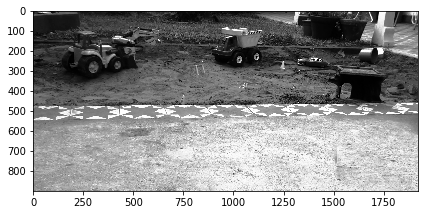

In [6]:
image_0 = np.copy(images[0])
image_1 = np.copy(images[2])
reference_image = create_reference_image(image_0, image_1)

In [8]:
centroids = []
for image in images:
    transformed = apply_threshold_and_morphology(image)
    centroids.append(get_centroid_image(transformed))
centroids

Threshold:  0.2868625396503665
Threshold:  0.2980022222205946
Threshold:  0.28703401258434824
Threshold:  0.2869794100531219
Threshold:  0.2636334787048735
Threshold:  0.279119992621822
Threshold:  0.26352891692062963
Threshold:  0.27131190441769715
Threshold:  0.26748732127125463
Threshold:  0.2597118960223057
Threshold:  0.2792171190119911
Threshold:  0.30255208608378226
Threshold:  0.30256663984300536


[(691.9864048851779, 1735.8428631311815),
 (660.2131661036254, 1539.1801602402309),
 (606.8144871025795, 1278.1096008071113),
 (593.8139558089807, 1228.2071418389166),
 (615.6780681774312, 1291.868213463048),
 (616.2859070776045, 953.358378702593),
 (613.1789036602012, 1002.0585678072057),
 (613.7621188654384, 993.2554728495804),
 (593.2230361481263, 1155.0882230238778),
 (565.4548513431519, 1415.7128219979038),
 (593.7588257813995, 1313.2929393748805),
 (678.4421194377619, 1323.6223049339567),
 (709.203038993478, 1393.4659789999537)]

In [16]:
max_y, max_x = reference_image.shape
y_fixed = [max_y - coord[0] for coord in centroids]
y = list(map(lambda v: v[0], centroids))
x = list(map(lambda v: v[1], centroids))

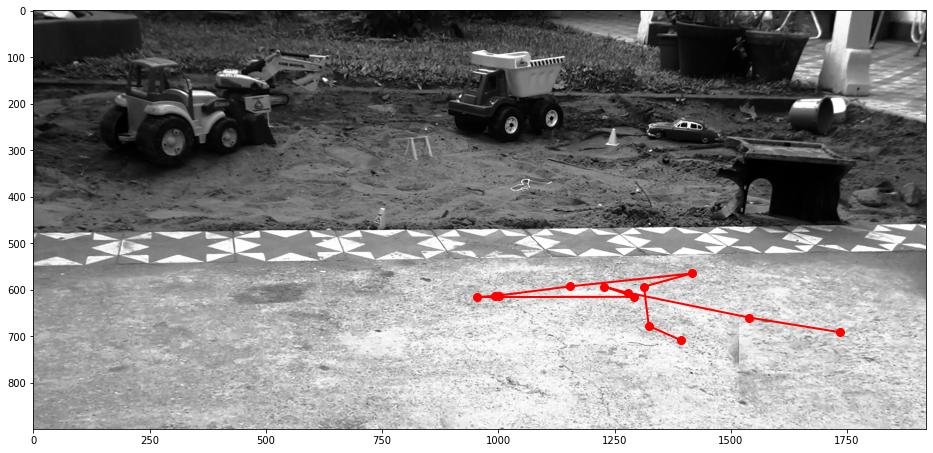

In [29]:
fig, ax = plt.subplots(figsize=(16, 12), sharex=True, sharey=True)
ax.quiver(x1, y1, (x2-x1), (y2-y1), angles='xy', scale_units='xy', scale=1)
ax.plot(x, y, '-o', color='red', linewidth=2, markersize=8)
ax.imshow(reference_image, 'gray')
# fig, ax = plt.subplots()

# ax.plot(x, y_fixed)